In [205]:
%load_ext autoreload

In [206]:
%autoreload 2

In [251]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

from utils import contour_plot
from gaussian_posterior_approx import true_log_posterior, laplace_approx

In [310]:
np.random.seed(42)

In [314]:
data = np.random.normal(size=15)

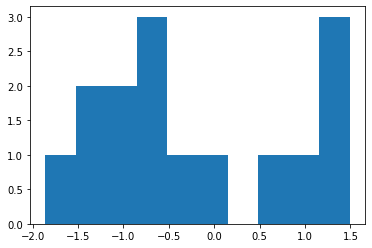

In [315]:
plt.hist(data);

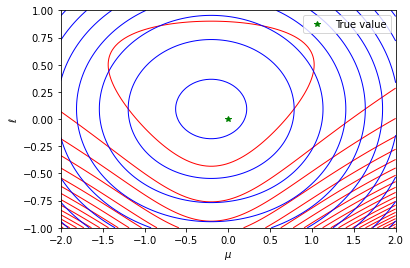

In [317]:
kwargs = {
    "func_kwargs": {"data": data},
    "x_range": 2,
    "y_range": 1,
}
contour_plot(
    [lambda inputs, data: true_log_posterior(*inputs.T, data)],
    contour_kwargs={
        "colors": "red",
        "levels": 20,
        "linestyles": "solid",
        "linewidths": 1,
    },
    **kwargs
)
contour_plot(
    [lambda inputs, data: laplace_approx(*inputs.T, data)],
    contour_kwargs={
        "colors": "blue",
        "levels": 10,
        "linestyles": "solid",
        "linewidths": 1,
    },
    **kwargs
)

plt.plot([0], [0], "g*", label="True value")
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\ell$")
plt.legend()
plt.savefig("../img/gaussian-posterior-approx.png", dpi=400)